# Regression model for predicting apartment prices 


In [18]:
import pandas as pd
import numpy as np

# Dataset

The New York City Airbnb Open Data is used from Kaggle 

# EDA

In [13]:
#load data 
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [14]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Look at the price variable & check if it has a long tail.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

<AxesSubplot:xlabel='price', ylabel='Count'>

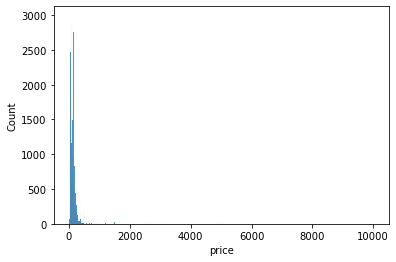

In [8]:
sns.histplot (df.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

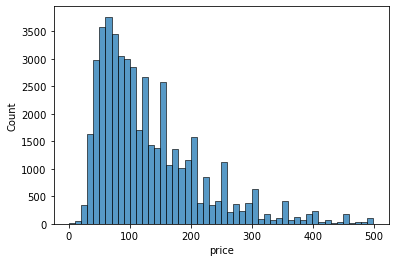

In [9]:
sns.histplot (df.price[df.price < 500], bins=50)

It has a long tail so we want to get rid of the tail by applyig logarithim to have more compact prices and it cause model confusion. 

In [16]:
price_logs = np.log1p(df.price)
price_logs

0        5.010635
1        5.420535
2        5.017280
3        4.499810
4        4.394449
           ...   
48890    4.262680
48891    3.713572
48892    4.753590
48893    4.025352
48894    4.510860
Name: price, Length: 48895, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

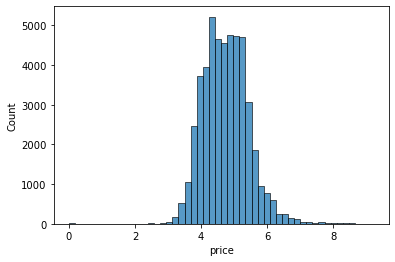

In [17]:
sns.histplot (price_logs, bins=50)

Values become smaller and tail gone .. Now it is a normal distribution and it is predicted better by models

# Features

In [19]:
features = ['latitude', 'longitude', 'price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
df = df[features]
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


# Question (1)

In [20]:
#Find a feature with missing values. How many missing values does it have?

In [21]:
df.isnull(). sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Feature -> reviews_per_month
#Number of missing values = 10052


# Question (2)

In [22]:
#What's the median (50% percentile) for variable 'minimum_nights'?

In [23]:
df['minimum_nights'].median()

3.0

# Split the data

In [28]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [29]:
n, n_val + n_test + n_train

(48895, 48895)

In [30]:
n_val, n_test, n_train

(9779, 9779, 29337)

In [31]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [32]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [33]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

df_train

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30
...,...,...,...,...,...,...,...,...
14975,40.71178,-73.95779,95,2,0,NaN,1,0
14661,40.78638,-73.97004,101,30,10,0.40,1,0
24515,40.72716,-73.98524,100,3,75,3.12,1,60
31460,40.79578,-73.94523,68,2,31,2.10,1,265


In [34]:
len(df_train),len(df_val),len(df_test)

(29337, 9779, 9779)

In [37]:
#df_train used to make feature matrix "X"
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [38]:
#get array (y) target matrix
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [39]:
#we need to remove price variable from df to not use it accediently for training purposes
del df_train['price']
del df_val['price']
del df_test['price']

# Question (3)

Best way to fill NAs ??

fill it with 0 or with the mean of this variable ??!

In [40]:
# Fill missing values with 0

In [41]:
X_train_zero = df_train.fillna(0)
X_val_zero = df_val.fillna(0)

In [42]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [44]:
w_0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
w_0_zero, w_zero

(-419.9126586345957,
 array([ 1.30676225e+00, -5.02167855e+00, -5.59803110e-04, -4.07634896e-04,
        -8.25470066e-03,  1.33371320e-03,  6.50203890e-04]))

In [45]:
y_pred_zero = w_0_zero + X_val_zero.dot(w_zero)
y_pred_zero

0       4.578533
1       4.483756
2       4.735864
3       5.068984
4       3.741253
          ...   
9774    3.772410
9775    4.746947
9776    4.771823
9777    4.755920
9778    4.781920
Length: 9779, dtype: float64

In [46]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [48]:
rmse_zero = round(rmse(y_val, y_pred_zero),2)
rmse_zero

0.64

In [49]:
# Fill missing values with mean 

In [50]:
tr_mean = df_train.mean()

In [51]:
X_train_mean = df_train.fillna(tr_mean)
X_val_mean = df_val.fillna(tr_mean)

In [52]:
w_0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
w_0_mean, w_mean

(-423.53930819565585,
 array([ 1.31148321e+00, -5.06799071e+00, -4.87741552e-04, -6.63849280e-04,
         5.34563274e-03,  1.32706019e-03,  6.38794182e-04]))

In [53]:
y_pred_mean = w_0_mean + X_val_mean.dot(w_mean)
y_pred_mean

0       4.564049
1       4.475865
2       4.727067
3       5.066516
4       3.723619
          ...   
9774    3.758776
9775    4.738050
9776    4.762717
9777    4.747615
9778    4.810815
Length: 9779, dtype: float64

In [55]:
rmse_mean = round(rmse(y_val, y_pred_mean),2)
rmse_mean

0.64

Both models were the same VALUE 

# Question (4)

In [56]:
X_train_zero = df_train.fillna(0)
X_val_zero = df_val.fillna(0)

In [57]:
reg_array = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [58]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [59]:
for r in reg_array:
    w_0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)
    y_pred = w_0 + X_val_zero.dot(w)
    print(f'RMSE LR with reg {r}: {round(rmse(y_val, y_pred), 2)}')

RMSE LR with reg 0: 0.64
RMSE LR with reg 1e-06: 0.64
RMSE LR with reg 0.0001: 0.64
RMSE LR with reg 0.001: 0.64
RMSE LR with reg 0.01: 0.66
RMSE LR with reg 0.1: 0.68
RMSE LR with reg 1: 0.68
RMSE LR with reg 5: 0.68
RMSE LR with reg 10: 0.68


The best regularization coefficient would be 0.

# Question (5)

In [61]:
score = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    # Define partitions sizes 
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    # Shuffle indices
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    # Create shuffled partitions 
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    
    # Log normalization of target variable from all partitions 
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    
    #remove price variable
    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    
     # Fill NAs of training and validation partitions with 0
    x_train_0 = df_train.fillna({'reviews_per_month':0})
    x_val_0 = df_val.fillna({'reviews_per_month':0})
    
    # Train LR model to get weights
    w0, w = train_linear_regression(x_train_0, y_train)
    
    #obtain predication matrix
    y_pred_0 = w0 + x_val_0.dot(w)
    
    # RMSE
    rmse_with_0 = rmse(y_val, y_pred_0)

    print('Seed: ', seed, 'RMSE: ', rmse_with_0)
    score.append(rmse_with_0)

print('Std of all scores: ', round(np.std(score),3))

Seed:  0 RMSE:  0.6549779961248564
Seed:  1 RMSE:  0.6462523685844059
Seed:  2 RMSE:  0.647655817737625
Seed:  3 RMSE:  0.6375145070438192
Seed:  4 RMSE:  0.6445809083258738
Seed:  5 RMSE:  0.6305809996849455
Seed:  6 RMSE:  0.6297851917458154
Seed:  7 RMSE:  0.6506184267134899
Seed:  8 RMSE:  0.6489780353719442
Seed:  9 RMSE:  0.6437565168202265
Std of all scores:  0.008


# Question (6)

In [69]:
# Shuffle indices
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

# Create shuffled partitions 
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Log normalization of target variable from all partitions 
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

#remove price variable
del df_train['price']
del df_val['price']
del df_test['price']

df_full_train = pd.concat([df_train, df_val])
df_full_train.reset_index(drop = True)

# Fill NAs of full train set with 0
x_full_train = df_full_train.fillna(0)

# Fill NAs of test set with 0
x_test = df_test.fillna(0)

# Concatenate training and validation target values 
y_full_train = np.concatenate([y_train, y_val])


# Train LR model to get weights
w0, w = train_linear_regression_reg(x_full_train, y_full_train, 0.001)


#obtain predication matrix
y_pred = w0 + x_test.dot(w)

# RMSE
score = rmse(y_test, y_pred)

# RMSE rounded
score = round(rmse(y_test, y_pred),2)

print('RMSE on test dataset is ', score)

RMSE on test dataset is  0.65
